In [2]:
import numpy as np
import plotly
import plotly.graph_objs as go
from IPython.core.display import HTML
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

Before we get into plotting the decision surface for our dataset, let's train a classifier with `sklearn` and visualise the decision tree.

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

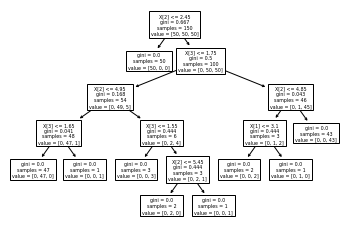

In [3]:
iris = load_iris()
classifier = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(classifier)

Now let's get into the nitty gritty. We're going to make a pairwise plot of comparing decision tree classifiers between each of the features. Since the iris dataset has multiple input features, we would want to compare how well it does when it focuses on each pair of these inputs. We're going to need to do a few things to achieve this:

1. We are going to have to separate the data set into each of the pairs of features
2. Train a decision tree classifier
3. Extract the decision surface of the trained classifier
4. Plot the decision surface with plotly

Note that this would not be possible without the fantastic documentation over at: https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py

In [4]:
# Parameters
n_classes = 3
plot_colors = "rgb"
plot_step = 0.02

fig = plotly.tools.make_subplots(rows=2, cols=3)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    y_ = np.arange(y_min, y_max, plot_step)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    heatmap = go.Heatmap(x=xx[0], y=y_, z=Z,
                  colorscale='Viridis',
                  showscale=False)

    scatter = go.Scatter(x=X[:, 0], y=X[:, 1], 
                        mode='markers',
                        showlegend=False,
                        marker=dict(size=5,
                                    color=y, 
                                    colorscale='Viridis',
                                    line=dict(color='black', width=1))
                        )

    # Plus one and mods are used because starting index is 1,1 for plotly
    x_plot_location = (pairidx % 2) + 1
    y_plot_location = (pairidx % 3) + 1
    fig.append_trace(heatmap,x_plot_location,y_plot_location)
    fig.append_trace(scatter,x_plot_location,y_plot_location)

HTML(plotly.offline.plot(fig, filename='Descision_tree_pairwise.html',include_plotlyjs='cdn'))

/Users/jackmckew/Github/jackmckew.dev/drafts/2020/decision-tree-classifier/.env/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Now that we've seen that we can produce a pairwise plot, let's go ahead and compare the accuracy scores for each of the models.

In [8]:
from sklearn.metrics import classification_report

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    Z = clf.predict(X)

    print(f"Classification report for {pair}")
    print(classification_report(y,Z))

Classification report for [0, 1]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.83      0.98      0.90        50
           2       0.98      0.80      0.88        50

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150

Classification report for [0, 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      1.00      0.99        50
           2       1.00      0.98      0.99        50

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Classification report for [0, 3]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      1

As we can see from the classification reports above, all of the pairwise classifiers score very well!